In [1]:
pip install statsmodels

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\UsEr\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecasted Energy Consumption for the next 10 days:
2023-12-01    8.050645
2023-12-02    7.700757
2023-12-03    8.164621
2023-12-04    7.752468
2023-12-05    7.863837
2023-12-06    8.151003
2023-12-07    7.737950
2023-12-08    8.039382
2023-12-09    7.942859
2023-12-10    7.748846
Freq: D, Name: predicted_mean, dtype: float64


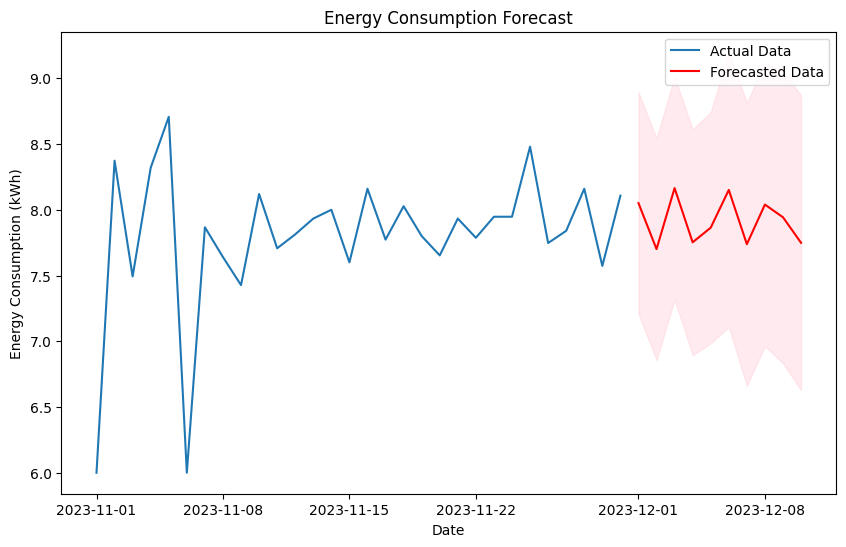

In [8]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

data = pd.read_csv('daily_energy_consumption.csv',parse_dates=['Date'], index_col='Date')
data = data[['Energy Consumption (kWh)', 'Temperature High (°C)', 'Temperature Low (°C)', 'Total AC Usage Time (minutes)']]
# Fit ARIMA model
model = ARIMA(data['Energy Consumption (kWh)'], order=(5,1,0))
fit_model = model.fit()
# Forecast the next 10 days
forecast = fit_model.get_forecast(steps=10)
# Extract forecasted values
forecast_values = forecast.predicted_mean
# Display the forecast
print("Forecasted Energy Consumption for the next 10 days:")
print(forecast_values)
# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Energy Consumption (kWh)'], label='Actual Data')
plt.plot(forecast_values.index, forecast_values.values, color='red', label='Forecasted Data')
plt.fill_between(forecast_values.index, forecast.conf_int()['lower Energy Consumption (kWh)'], forecast.conf_int()['upper Energy Consumption (kWh)'], color='pink', alpha=0.3)
plt.title('Energy Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()
